### K-nearest neighbors

In [42]:
import numpy as np
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.pipeline import Pipeline
from sklearn.metrics import precision_score, recall_score, f1_score

In [43]:
X, y = make_classification(n_samples=10000, n_features=2, n_informative=2, n_redundant=0, n_classes=3,
                           n_clusters_per_class=1, shift=4.77, scale=3.92, class_sep=1, random_state=2, )

In [44]:
X

array([[26.31909816, 16.71035762],
       [24.18238494, 14.66173213],
       [25.65102165, 25.38739525],
       ...,
       [27.70716259, 27.5208251 ],
       [27.22701881, 18.19923433],
       [13.41777462, 23.27972132]])

<Axes: >

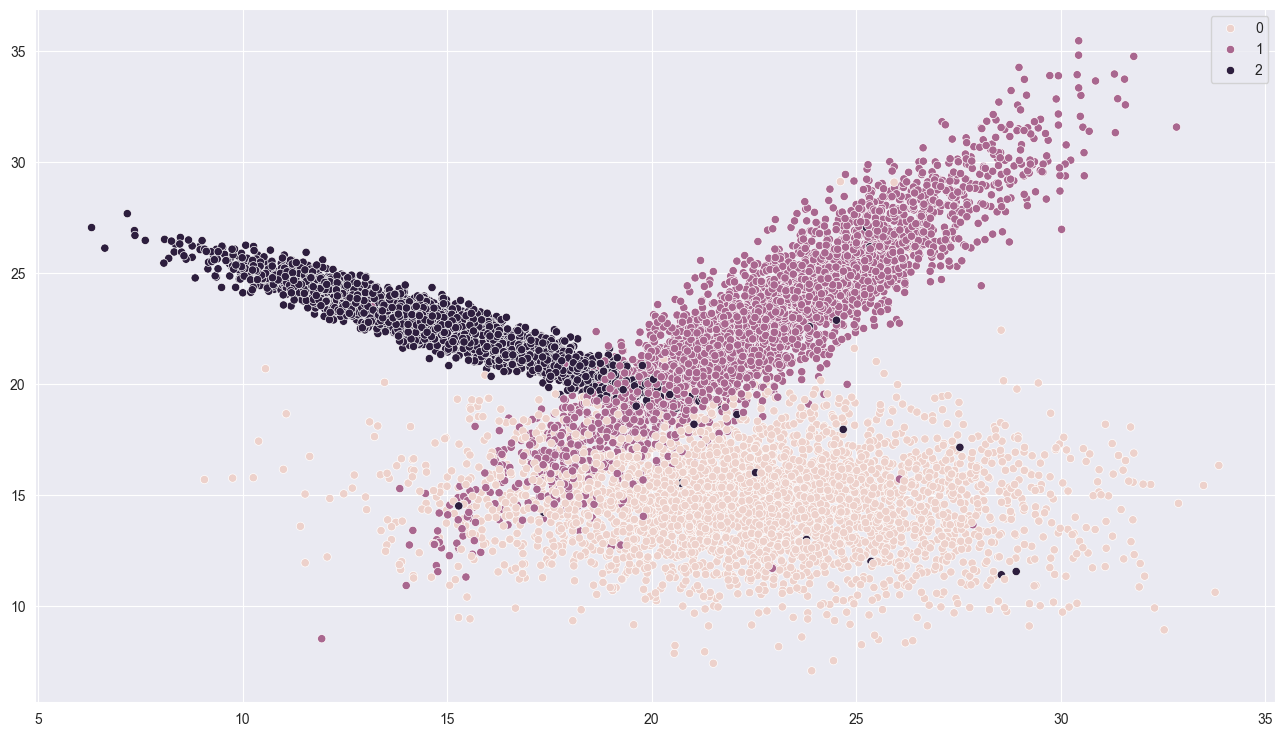

In [45]:
fig, ax = plt.subplots(1, 1, figsize=(16, 9))
sns.scatterplot(x=X[:, 0], y=X[:, 1], hue=y, ax=ax)

In [46]:
X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, shuffle=True, test_size=0.4, random_state=42,)

In [47]:
X_train.shape

(6000, 2)

In [48]:
pipe = Pipeline([
    ('scale', StandardScaler()),
    ('clf', KNeighborsClassifier(n_neighbors=1, p=2))
])

$$ a(u) = \mathrm{arg}\max_{y\in Y} \sum_{i=1}^m \bigl[ x_{i; u}=y \bigr] w(i,u) $$

$$ {\displaystyle \rho (x,y)=\left(\sum _{i=1}^{n}|x_{i}-y_{i}|^{p}\right)^{1/p}} $$

![pic](../pics/2D_unit_balls.svg)

In [49]:
pipe.fit(X_train, y_train)

Pipeline(steps=[('scale', StandardScaler()),
                ('clf', KNeighborsClassifier(n_neighbors=1))])

In [50]:
preds_test = pipe.predict(X_test)
preds_train = pipe.predict(X_train)

In [51]:
print('[TRAIN] Precision macro', precision_score(y_train, preds_train, average='macro'))
print('[TEST] Precision macro', precision_score(y_test, preds_test, average='macro'))
print()
print('[TRAIN] Recall macro', recall_score(y_train, preds_train, average='macro'))
print('[TEST] Recall macro', recall_score(y_test, preds_test, average='macro'))
print()
print('[TRAIN] F1 macro', f1_score(y_train, preds_train, average='macro'))
print('[TEST] F1 macro', f1_score(y_test, preds_test, average='macro'))


[TRAIN] Precision macro 1.0
[TEST] Precision macro 0.9254002267071629

[TRAIN] Recall macro 1.0
[TEST] Recall macro 0.9254979825362589

[TRAIN] F1 macro 1.0
[TEST] F1 macro 0.9254426671074519


/var/folders/dv/l5yj1vt95y51qzyhmdns2cgw0000gn/T/ipykernel_60255/3751794134.py:29: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


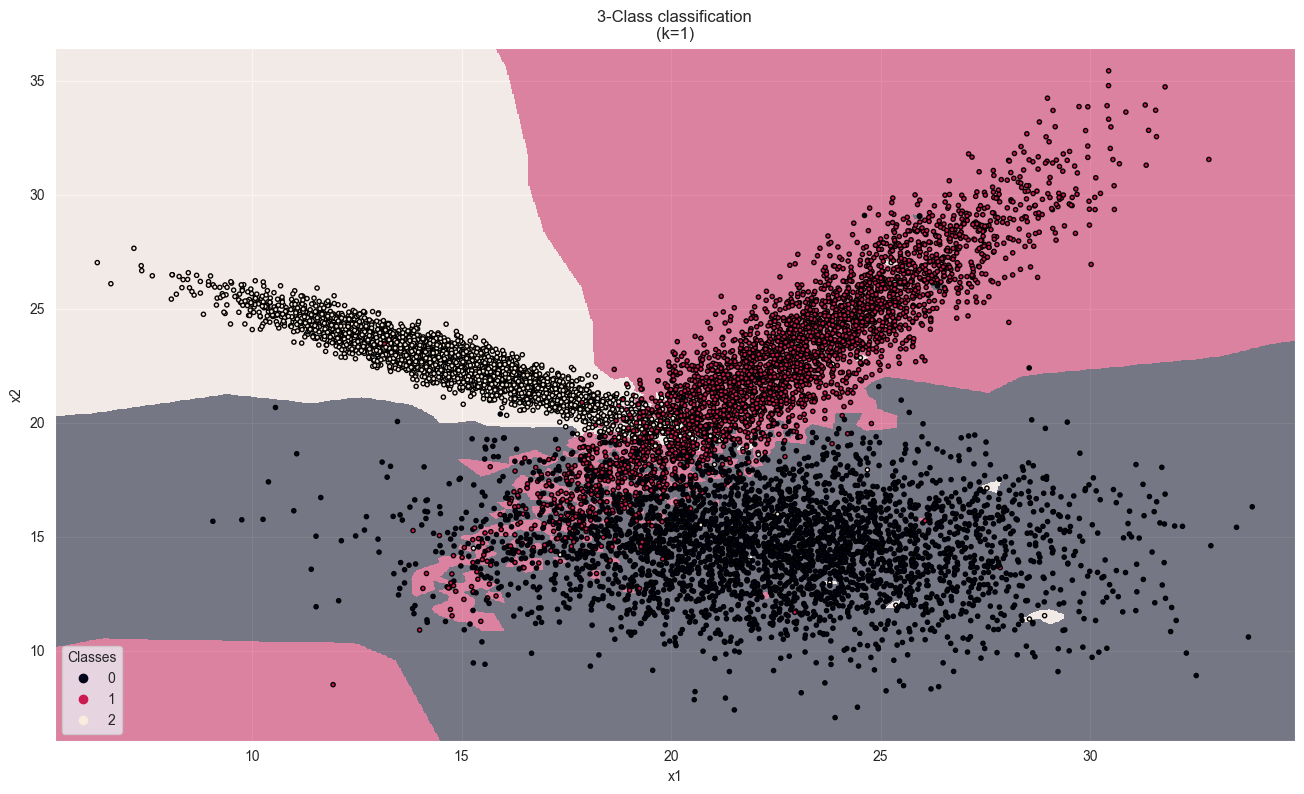

In [52]:
import matplotlib.pyplot as plt
from sklearn.inspection import DecisionBoundaryDisplay


fig, ax = plt.subplots(figsize=(16, 9))
disp = DecisionBoundaryDisplay.from_estimator(
    pipe,
    X_test,
    response_method="predict",
    plot_method="pcolormesh",
    grid_resolution=1000,
    xlabel='x1',
    ylabel='x2',
    shading='auto',
    alpha=0.5,
    ax=ax,
)
scatter = disp.ax_.scatter(X[:, 0], X[:, 1], c=y, edgecolors="k", marker='.')
disp.ax_.legend(
    scatter.legend_elements()[0],
    [0, 1, 2],
    loc="lower left",
    title="Classes",
)
disp.ax_.set_title(
    f"3-Class classification\n(k={pipe[-1].n_neighbors})"
)

fig.show()

In [89]:
from sklearn.neighbors import RadiusNeighborsClassifier

In [90]:
pipe = Pipeline([
    ('scale', StandardScaler()),
    ('clf', RadiusNeighborsClassifier(radius=0.1, weights='distance', p=2, outlier_label=-1))
])

In [91]:
pipe.fit(X_train, y_train)

Pipeline(steps=[('scale', StandardScaler()),
                ('clf',
                 RadiusNeighborsClassifier(outlier_label=-1, radius=0.1,
                                           weights='distance'))])

In [92]:
preds_test = pipe.predict(X_test)
preds_train = pipe.predict(X_train)

/Users/gultiaeva/Desktop/M23ML/env/lib/python3.8/site-packages/sklearn/neighbors/_classification.py:768: UserWarning: Outlier label -1 is not in training classes. All class probabilities of outliers will be assigned with 0.
  warnings.warn(


In [93]:
print('[TRAIN] Precision macro', precision_score(y_train, preds_train, average='macro'))
print('[TEST] Precision macro', precision_score(y_test, preds_test, average='macro'))
print()
print('[TRAIN] Recall macro', recall_score(y_train, preds_train, average='macro'))
print('[TEST] Recall macro', recall_score(y_test, preds_test, average='macro'))
print()
print('[TRAIN] F1 macro', f1_score(y_train, preds_train, average='macro'))
print('[TEST] F1 macro', f1_score(y_test, preds_test, average='macro'))


[TRAIN] Precision macro 1.0
[TEST] Precision macro 0.7105739305538454

[TRAIN] Recall macro 1.0
[TEST] Recall macro 0.6988224248844881

[TRAIN] F1 macro 1.0
[TEST] F1 macro 0.7045566144610577


/Users/gultiaeva/Desktop/M23ML/env/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [94]:
pipe.predict([[30, 30]])

array([1])

In [95]:
pipe.predict([[10, 25]])

array([2])

In [96]:
pipe.predict([[30, 10]])

array([0])

In [97]:
pipe.predict([[100000, 20]])

/Users/gultiaeva/Desktop/M23ML/env/lib/python3.8/site-packages/sklearn/neighbors/_classification.py:768: UserWarning: Outlier label -1 is not in training classes. All class probabilities of outliers will be assigned with 0.
  warnings.warn(


array([-1])

### Метод парзеновского окна

$$ a(u) = \mathrm{arg}\max_{y\in Y} \sum_{i=1}^m \bigl[ x_{i; u}=y \bigr] w(i,u) $$

$$w(i,u) = K\biggl(\frac{\rho(u,x_{i; u})}{h}\biggr)$$





$$ a(u) = \mathrm{arg}\max_{y\in Y} \sum_{i=1}^m \bigl[ x_{i; u}=y \bigr] K\biggl(\frac{\rho(u,x_{i; u})}{h}\biggr) $$

### Ядерная оценка плотности

$$ \hat{f_h}(x)=\frac{1}{nh}\sum_{i=1}^{n}K \left( \frac{x-x_i}{h} \right) $$

In [98]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [99]:
X

array([[26.31909816, 16.71035762],
       [24.18238494, 14.66173213],
       [25.65102165, 25.38739525],
       ...,
       [27.70716259, 27.5208251 ],
       [27.22701881, 18.19923433],
       [13.41777462, 23.27972132]])

<Axes: ylabel='Count'>

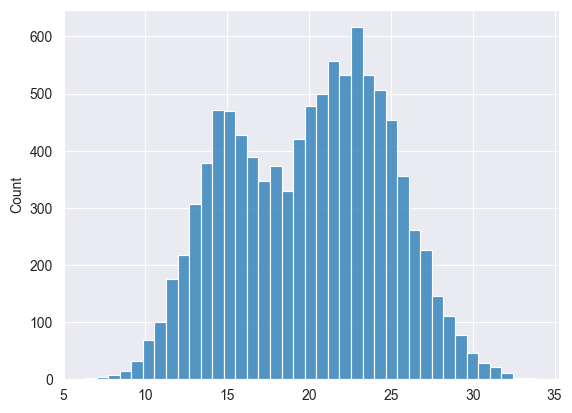

In [100]:
sns.histplot(X[:, 0])

In [101]:
def kernel_gaussian(x):
    return np.power(2*np.pi, -0.5) * np.exp(-0.5*np.power(x, 2))

def kernel_epanechnikov(x):
    return ((3/4) * (1 - np.power(x, 2))) * (np.abs(x) <= 1)

def kernel_squared(x):
    return (15/16) * np.power(1 - np.power(x, 2), 2) * (np.abs(x) <= 1)

def kernel_triangle(x):
    return (1 - np.abs(x)) * (np.abs(x) <= 1)

def kernel_rectangle(x):
    return 0.5 * (np.abs(x) <= 1)

In [102]:
from typing import Callable

class KernelDensityEstimation:
    
    
    def __init__(self, h: float, kernel_function: Callable) -> None:
        self.kernel = kernel_function
        self.window_size = h
        
    def fit(self, X):
        self.data = X.copy()
        
    def _transfrom_one(self, x):
        return (
            self.kernel((x - self.data) / self.window_size).sum() 
            / (self.data.shape[0] * self.window_size)
        )
    
    def transform(self, X):
        func = np.vectorize(self._transfrom_one)
        return func(X)
        

In [109]:
kde = KernelDensityEstimation(0.5, kernel_gaussian)

In [110]:
kde.fit(X[:, 0])

In [111]:
kde_transformed = kde.transform(X[:, 0])

In [112]:
kde_transformed

array([0.04049751, 0.07294934, 0.05189195, ..., 0.02398544, 0.02966756,
       0.04928109])

In [113]:
mask = np.argsort(X[:, 0])

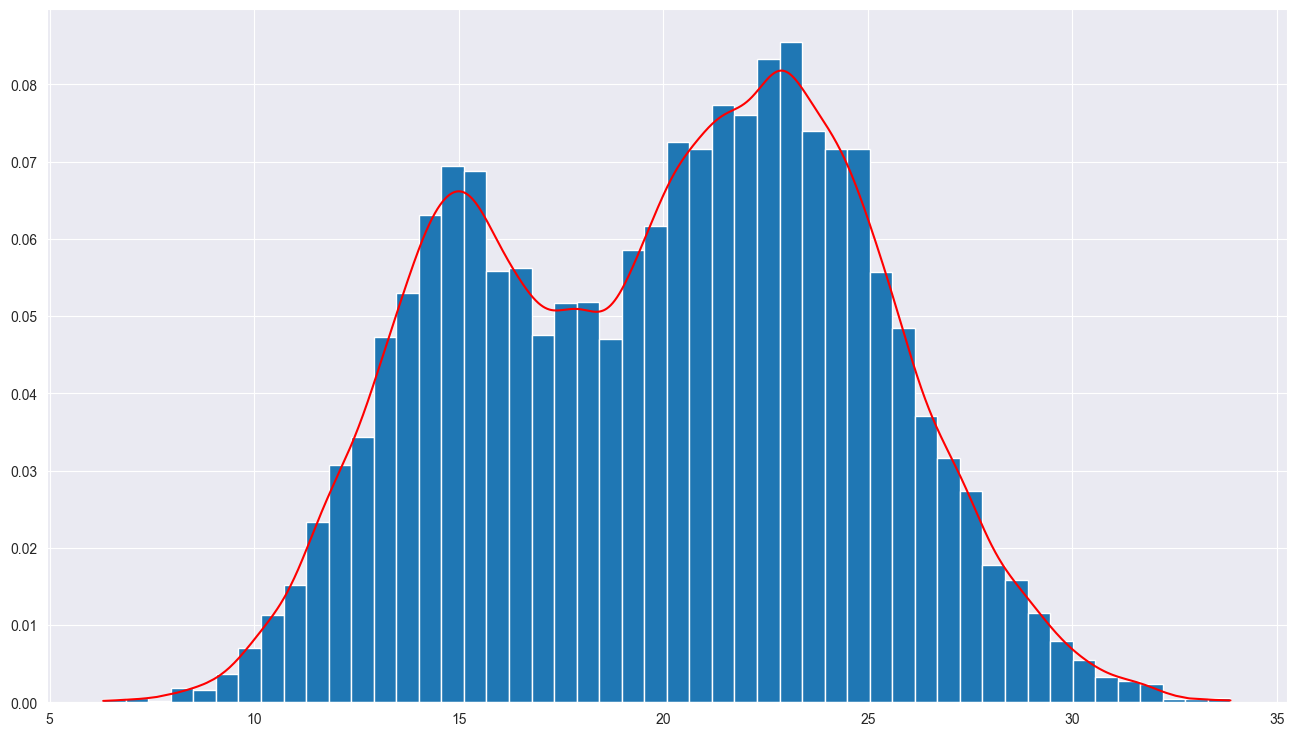

In [114]:
fig, ax = plt.subplots(1, 1, figsize=(16, 9))


ax.hist(x=X[:, 0], bins=50, density=True)
ax.plot(X[:, 0][mask], kde_transformed[mask], color='red')

#### Эмпирическое правило для гауссова ядра

$$h=\left( \frac{4\hat{\sigma}^5}{3n}\right)^{\frac{1}{5}} \approx 1.06\hat{\sigma}n^{-1\mathbin{/}5}$$

### Ядра

![pic](../pics/image012.jpg )



| Ядро    | Формула |
| --------: |:---|
|Епанечникова| 	$$K_1(r)=E(r)=\frac{3}{4}(1-r^2){[}{\|}r{\|}<=1{]}$$  |
|Квартическое| 	$$K_2(r)=Q(r)=\frac{15}{16}(1-r^2)^2{[}{\|}r{\|}<=1{]}$$  |
|Треугольное| 	$$K_3(r)=T(r)=(1-{\|}r{\|}){[}{\|}r{\|}<=1{]}$$  |
|Гауссовское| 	$$K_4(r)=G(r)=(2\pi)^{(-\frac{1}{2})}exp(-\frac{1}{2}r^2)$$  |
|Прямоугольное| $$K_5(r)=\Pi(r)=\frac{1}{2}{[}{\|}r{\|}<=1{]}$$	  |



In [115]:
import numpy as np

In [236]:
def kernel_epanechnikov(distances):
    return ((3/4) * (1-np.power(distances, 2))) * (np.abs(distances) <= 1)

def kernel_squared(distances):
    return (15/16) * np.power(1-np.power(distances, 2), 2) * (np.abs(distances) <= 1)

def kernel_triangle(distances):
    return (1 - np.abs(distances)) * (np.abs(distances) <= 1)

def kernel_gaussian(distances):
    return np.power(2*np.pi, -0.5) * np.exp(-0.5*np.power(distances, 2))

def kernel_rectangle(distances):
    return 0.5 * (np.abs(distances) <= 1)

In [117]:
x = np.linspace(-1.1, 1.1, 100)
y1 = kernel_epanechnikov(x)
y2 = kernel_squared(x)
y3 = kernel_triangle(x)
y4 = kernel_gaussian(x)
y5 = kernel_rectangle(x)

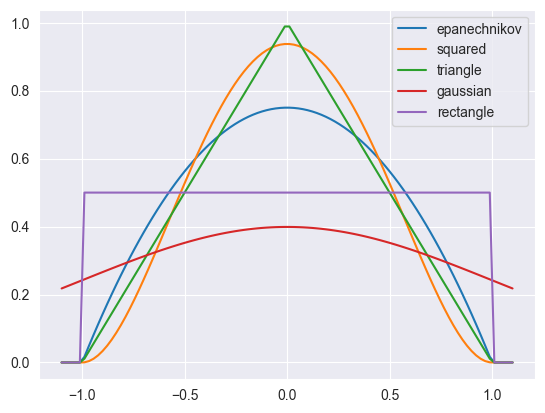

In [118]:
plt.plot(x, y1, label='epanechnikov')
plt.plot(x, y2, label='squared')
plt.plot(x, y3, label='triangle')
plt.plot(x, y4, label='gaussian')
plt.plot(x, y5, label='rectangle')

plt.legend()

In [284]:
def kernel_epanechnikov(distances):
    distances = np.asarray(distances)
    return ((3/4) * (1-np.power(distances, 2))) #* (np.abs(distances) <= 1)

def kernel_squared(distances):
    distances = np.asarray(distances)
    return (15/16) * np.power(1-np.power(distances, 2), 2) #* (np.abs(distances) <= 1)
    

def kernel_triangle(distances):
    distances = np.asarray(distances)
    return (1 - np.abs(distances)) # * (np.abs(distances) <= 1)

def kernel_gaussian(distances):
    distances = np.asarray(distances)
    return np.power(2*np.pi, -0.5) * np.exp(-0.5*np.power(distances, 2))

def kernel_rectangle(distances):
    distances = np.asarray(distances)
    return 0.5 #* (np.abs(distances) <= 1)

In [296]:
pipe = Pipeline([
    ('scale', StandardScaler()),
    ('clf', RadiusNeighborsClassifier(radius=0.1, weights=kernel_epanechnikov, p=2, outlier_label=-1, ))
])

In [297]:
pipe.fit(X_train, y_train)

Pipeline(steps=[('scale', StandardScaler()),
                ('clf',
                 RadiusNeighborsClassifier(outlier_label=-1, radius=0.1,
                                           weights=<function kernel_epanechnikov at 0x3eb82b700>))])

In [298]:
preds = pipe.predict(X_test)

/Users/gultiaeva/Desktop/M23ML/env/lib/python3.8/site-packages/sklearn/neighbors/_classification.py:768: UserWarning: Outlier label -1 is not in training classes. All class probabilities of outliers will be assigned with 0.
  warnings.warn(


In [299]:
preds[preds == -1]

array([-1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
       -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
       -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
       -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1])

<Axes: >

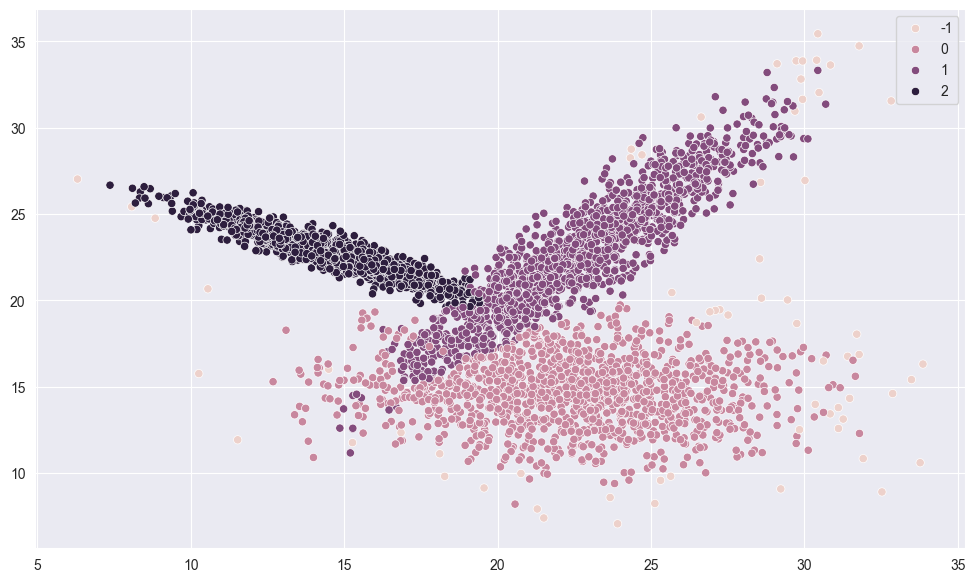

In [300]:
fig, ax = plt.subplots(1, 1, figsize=(12, 7))
sns.scatterplot(x=X_test[:, 0], y=X_test[:, 1], hue=preds, legend='full', ax=ax)